# Summer School on Data Science Tools and Techniques in Modelling Complex Networks

### [Bogumił Kamiński](http://bogumilkaminski.pl/about/)

## Working with graph data using Julia Language
### Day 2, Tuesday, August 20th, 2019, 13:00 to 16:00

## Erdős–Rényi model

In [1]:
using Pkg
Pkg.activate(".")
using LightGraphs
using Distributions
using Statistics
using DataFrames
using GraphPlot
using PyPlot

In the $G(n, p)$ model, a graph is constructed by connecting $n$ nodes randomly.

Each edge is included in the graph with probability $p$ independent from every other edge.

In [2]:
function ER_dense(n, p)
    g = SimpleGraph(n)
    for i in 1:n, j in i+1:n
        if rand() < p
            add_edge!(g, i, j)
        end
    end
    g
end

ER_dense (generic function with 1 method)

In [3]:
g1 = ER_dense(10, 0.5)

{10, 28} undirected simple Int64 graph

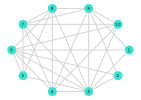

In [4]:
gplot(g1, nodelabel=1:10, layout=circular_layout)

In [5]:
collect(edges(g1))

28-element Array{LightGraphs.SimpleGraphs.SimpleEdge{Int64},1}:
 Edge 1 => 3 
 Edge 1 => 6 
 Edge 1 => 9 
 Edge 2 => 3 
 Edge 2 => 6 
 Edge 2 => 9 
 Edge 3 => 4 
 Edge 3 => 5 
 ⋮           
 Edge 6 => 8 
 Edge 6 => 10
 Edge 7 => 8 
 Edge 7 => 9 
 Edge 7 => 10
 Edge 8 => 9 
 Edge 9 => 10

In [6]:
[rand(1:5) for i in 1:10]

10-element Array{Int64,1}:
 2
 5
 1
 4
 5
 3
 3
 1
 3
 1

In [7]:
function ER_sparse(n, p)
    g = SimpleGraph(n)
    m = rand(Binomial(div(n*(n-1), 2), p))
    while ne(g) < m
        i, j = rand(1:n), rand(1:n)
        if i != j
            add_edge!(g, i, j)
        end
    end
    g
end

ER_sparse (generic function with 1 method)

In [8]:
g2 = ER_sparse(10, 0.5)

{10, 20} undirected simple Int64 graph

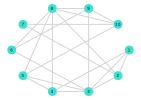

In [9]:
gplot(g2, nodelabel=1:10, layout=circular_layout)

In [10]:
collect(edges(g2))

20-element Array{LightGraphs.SimpleGraphs.SimpleEdge{Int64},1}:
 Edge 1 => 2 
 Edge 1 => 3 
 Edge 1 => 4 
 Edge 2 => 3 
 Edge 2 => 7 
 Edge 2 => 8 
 Edge 3 => 4 
 Edge 3 => 5 
 ⋮           
 Edge 5 => 10
 Edge 6 => 8 
 Edge 6 => 9 
 Edge 7 => 10
 Edge 8 => 9 
 Edge 8 => 10
 Edge 9 => 10

In [11]:
degree(g2)

10-element Array{Int64,1}:
 3
 4
 6
 4
 4
 3
 2
 6
 4
 4

In [12]:
for p in (0.001, 0.01, 0.1)
    println("p = $p")
    @time ER_dense(10000, p)
    @time ER_sparse(10000, p)
end

p = 0.001
  0.224805 seconds (36.76 k allocations: 3.041 MiB)
  0.020963 seconds (37.35 k allocations: 3.157 MiB)
p = 0.01
  0.355682 seconds (70.04 k allocations: 21.666 MiB, 3.26% gc time)
  0.345272 seconds (70.15 k allocations: 21.891 MiB, 1.63% gc time)
p = 0.1
  1.582449 seconds (102.03 k allocations: 191.999 MiB, 12.38% gc time)
  7.620522 seconds (103.08 k allocations: 208.438 MiB, 4.42% gc time)


## Mean degree analysis

In [13]:
er_mean_degree = DataFrame(n=Int[], d=Float64[], sample_d=Float64[])

,n,d,sample_d
,Int64,Float64,Float64


In [14]:
d = 2
for n in [10, 100, 1000, 10000]
    for reps in 1:1000
        g = erdos_renyi(n, d/(n-1))
        degs = degree(g)
        push!(er_mean_degree, (n, d, mean(degs)))
    end
end
er_mean_degree

,n,d,sample_d
,Int64,Float64,Float64
1,10,2.0,1.2
2,10,2.0,1.8
3,10,2.0,2.8
4,10,2.0,1.4
5,10,2.0,3.0
6,10,2.0,1.4
7,10,2.0,2.4
8,10,2.0,1.4
9,10,2.0,1.6


In [15]:
res = by(er_mean_degree, [:n, :d], mean_degree=:sample_d=>mean, std_degree=:sample_d=>std)

,n,d,mean_degree,std_degree
,Int64,Float64,Float64,Float64
1,10,2.0,1.9894,0.558999
2,100,2.0,2.00378,0.198547
3,1000,2.0,2.00021,0.0651507
4,10000,2.0,2.00054,0.0194055


## Giant component

In [16]:
function largest_component(n, d)
    g = erdos_renyi(n, d/(n-1))
    ccs = connected_components(g)
    sizes = length.(ccs)
    maximum(sizes) / n
end

largest_component (generic function with 1 method)

In [17]:
lc_df_10k = DataFrame(d=Float64[], largest=Float64[])

,d,largest
,Float64,Float64


In [18]:
for d in 0.8:0.01:2.0
    for reps in 1:32
        push!(lc_df_10k, (d, largest_component(10000, d)))
    end
end
lc_df_10k

,d,largest
,Float64,Float64
1,0.8,0.0046
2,0.8,0.0037
3,0.8,0.0134
4,0.8,0.0055
5,0.8,0.0076
6,0.8,0.0052
7,0.8,0.0035
8,0.8,0.0053
9,0.8,0.008


In [19]:
res = by(lc_df_10k, :d, mean_largest=:largest=>mean, std_largest=:largest=>std)

,d,mean_largest,std_largest
,Float64,Float64,Float64
1,0.8,0.00665937,0.00307769
2,0.81,0.0069125,0.00226356
3,0.82,0.0075125,0.0029513
4,0.83,0.00774063,0.00176066
5,0.84,0.00905313,0.0044474
6,0.85,0.00951563,0.00364409
7,0.86,0.0107781,0.00620175
8,0.87,0.0115594,0.00484554
9,0.88,0.0117406,0.00368894


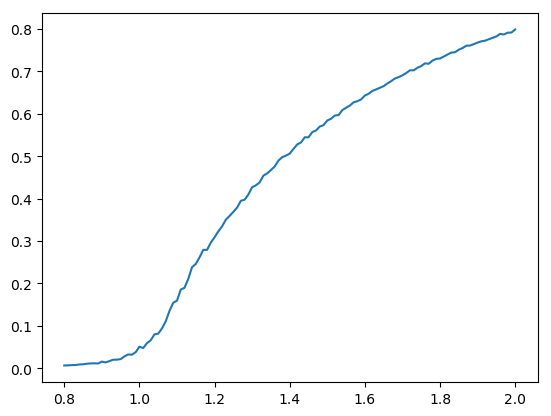

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000001F140B8>

In [20]:
plot(res.d, res.mean_largest)

In [21]:
df_largest_n = DataFrame(n=Int[], d=Float64[], largest=Float64[])

,n,d,largest
,Int64,Float64,Float64


In [22]:
for d in [0.9, 1.0, 1.1, 1.2]
    for n in [2^i for i in 8:16]
        for reps in 1:64
            push!(df_largest_n, (n, d, largest_component(n, d)))
        end
    end
end
df_largest_n

,n,d,largest
,Int64,Float64,Float64
1,256,0.9,0.0898438
2,256,0.9,0.222656
3,256,0.9,0.046875
4,256,0.9,0.132813
5,256,0.9,0.0742188
6,256,0.9,0.210938
7,256,0.9,0.0664063
8,256,0.9,0.0703125
9,256,0.9,0.0664063


In [23]:
res = groupby(by(df_largest_n, [:n, :d], m=:largest=>mean), :d)

,n,d,m
,Int64,Float64,Float64
1,256,0.9,0.112671
2,512,0.9,0.067627
3,1024,0.9,0.0537109
4,2048,0.9,0.0385361
5,4096,0.9,0.0235863
6,8192,0.9,0.0158863
7,16384,0.9,0.0108042
8,32768,0.9,0.00610828
9,65536,0.9,0.00380921


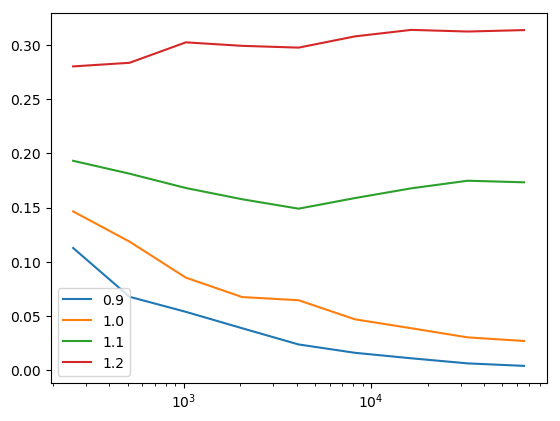

In [24]:
for sdf in res
    plot(sdf.n, sdf.m)
end
legend([sdf.d[1] for sdf in res])
plt.xscale("log")